In [8]:
from bs4 import BeautifulSoup
import requests

# Importar librerías para manipulación y análisis de datos
# -----------------------------------------------------------------------
import pandas as pd

# Importar librerías para procesamiento de texto
# -----------------------------------------------------------------------
import re

In [9]:
# definimos la url de la página de la vamos a sacar datos
url_coches = "https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2"

# hacemos la request a la página de la que queremos sacar la info
url_coches_llamada = requests.get(url_coches)

# vemos si todo ha ido bien
print("La respuesta de la petición es:", url_coches_llamada.status_code)

La respuesta de la petición es: 200


<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8" class="next-head"/>
  <title class="next-head">
   Coches de segunda mano, ocasión y seminuevos | OcasionPlus
  </title>
  <meta class="next-head" content="4000 coches de ocasión y segunda mano con descuentos de hasta 6000€, la mejor relación calidad-precio garantizada." name="description"/>
  <meta class="next-head" content="noindex, follow, noarchive" name="robots"/>
  <meta class="next-head" content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link class="next-head" href="/static/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link class="next-head" href="/static/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link class="next-head" href="/static/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link class="next-head" href="/static/favicon/favicon-194x194.png" rel="icon" sizes="194x194" type="image/png"/>
  <link class="next-head" href="/static/f
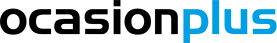

In [10]:
# creamos el objeto BeautifulSoup para poder acceder al contenido solicitado
sopa_coches = BeautifulSoup(url_coches_llamada.content, 'html.parser')

# mostramos por pantalla los resultados del objeto de Beautiful Soup. El método ".prettify()" nos ayuda a visualizar los resultados de una forma más amigable
print(sopa_coches.prettify())

"coche": Nombres de los coches.
"precio_rebajado": Precios rebajados.
"precio_original": Precios originales.
"km": Kilómetros recorridos.

In [11]:
# sacamos los nombres de los coches
lista_nombre_producto = sopa_coches.find_all("h2", {"style": "overflow-x:hidden"})

# mostramos los resultados del método ".find_all()". Como dijimos al inicio este método nos va a devolver una lista
# Si lo exploramos un poco veremos que tenemos una lista de elemento y que tiene muchas cosas, pero si nos fijamos bien tenemos todos los nombres de los coches que tenemos en la página web
print("El resultado del método '.find_all()' es: \n",   lista_nombre_producto)

# es el momento de sacar la información útil del método que hemos usado previamente. Para eso lo primero que vamos a hacer es crearnos una lista donde iremos almacenado los resultados que queremos
nombres_productos = []

# dado que es una lista lo que vamos a hacer es iterar por la lista para poder acceder a cada uno de los elementos
for i in lista_nombre_producto:
    # utilizamos el método ".getText()" para sacar el texto de cada uno de los elementos y lo apendeamos a la lista que hemos creado previamente. 
    nombres_productos.append(i.getText())

print("\n--------------------------\n")

print("Los resultados de extraer el texto de cada uno de los elementos es:\n", nombres_productos)

El resultado del método '.find_all()' es: 
 [<h2 style="overflow-x:hidden">Ford Transit 350 125cv L3H2 Kombi Ambiente Trasera</h2>, <h2 style="overflow-x:hidden">Volvo V60 D3 Business Plus Auto (150 CV)</h2>, <h2 style="overflow-x:hidden">Audi A3 Sportback S line edition 1.6 TDI (116 CV) S tronic</h2>, <h2 style="overflow-x:hidden">Hyundai Tucson 1.6 CRDI 48V N-Line DT 4X2 (136 CV)</h2>, <h2 style="overflow-x:hidden">Opel Crossland X 1.2 Turbo Innovation (130 CV)</h2>, <h2 style="overflow-x:hidden">Skoda Superb Combi 2.0 TDI 190cv AdBlue tech L&amp;K</h2>, <h2 style="overflow-x:hidden">Kia Ceed 1.4 CVVT Drive (100 CV)</h2>, <h2 style="overflow-x:hidden">Skoda Octavia 1.6 TDI Active (115 CV)</h2>, <h2 style="overflow-x:hidden">Opel Corsa 1.3 CDTI Enjoy (75 CV)</h2>, <h2 style="overflow-x:hidden">Toyota Rav4 Hybrid Luxury (218 CV)</h2>, <h2 style="overflow-x:hidden">MG ZS 1.5 Luxury (106 CV)</h2>, <h2 style="overflow-x:hidden">Peugeot 308 BlueHDi 130 S&amp;S Style (130 CV)</h2>, <h2 styl

In [12]:
# sacamos los precios originales de los coches
lista_precio_original = sopa_coches.find_all("span", {"class":"jsx-2870186023 priceLast"})

# mostramos los resultados del método ".find_all()". Como dijimos al inicio este método nos va a devolver una lista
# Si lo exploramos un poco veremos que tenemos una lista de elemento y que tiene muchas cosas, pero si nos fijamos bien tenemos todos los nombres de los coches que tenemos en la página web
print("El resultado del método '.find_all()' es: \n",   lista_precio_original)

# es el momento de sacar la información útil del método que hemos usado previamente. Para eso lo primero que vamos a hacer es crearnos una lista donde iremos almacenado los resultados que queremos
precio_original = []

# dado que es una lista lo que vamos a hacer es iterar por la lista para poder acceder a cada uno de los elementos
for i in lista_precio_original:
    # utilizamos el método ".getText()" para sacar el texto de cada uno de los elementos y lo apendeamos a la lista que hemos creado previamente. 
    precio_original.append(i.getText())

print("\n--------------------------\n")

print("Los resultados de extraer el texto de cada uno de los elementos es:\n", precio_original)

#precio_original = [float (precio_original.split ()[0].replace ("."," ").replace (",", ".")) for precio_original in lista_precio_original]

El resultado del método '.find_all()' es: 
 [<span class="jsx-2870186023 priceLast">26.000<!-- -->€</span>, <span class="jsx-2870186023 priceLast">26.900<!-- -->€</span>, <span class="jsx-2870186023 priceLast">20.990<!-- -->€</span>, <span class="jsx-2870186023 priceLast">25.990<!-- -->€</span>, <span class="jsx-2870186023 priceLast">12.990<!-- -->€</span>, <span class="jsx-2870186023 priceLast">18.990<!-- -->€</span>, <span class="jsx-2870186023 priceLast">15.190<!-- -->€</span>, <span class="jsx-2870186023 priceLast">12.300<!-- -->€</span>, <span class="jsx-2870186023 priceLast">29.500<!-- -->€</span>, <span class="jsx-2870186023 priceLast">18.900<!-- -->€</span>, <span class="jsx-2870186023 priceLast">14.290<!-- -->€</span>, <span class="jsx-2870186023 priceLast">15.500<!-- -->€</span>, <span class="jsx-2870186023 priceLast">20.900<!-- -->€</span>, <span class="jsx-2870186023 priceLast">23.490<!-- -->€</span>, <span class="jsx-2870186023 priceLast">22.890<!-- -->€</span>, <span clas

In [13]:
# sacamos los precios rebajados de los coches
lista_precio_rebajado = sopa_coches.find_all("span", {"class":"jsx-2689423372 price"})

# mostramos los resultados del método ".find_all()". Como dijimos al inicio este método nos va a devolver una lista
# Si lo exploramos un poco veremos que tenemos una lista de elemento y que tiene muchas cosas, pero si nos fijamos bien tenemos todos los precios rebajados de los coches que tenemos en la página web
print("El resultado del método '.find_all()' es: \n",   lista_precio_rebajado)

# es el momento de sacar la información útil del método que hemos usado previamente. Para eso lo primero que vamos a hacer es crearnos una lista donde iremos almacenado los resultados que queremos
precio_rebajado = []

# dado que es una lista lo que vamos a hacer es iterar por la lista para poder acceder a cada uno de los elementos
for i in lista_precio_rebajado:
    # utilizamos el método ".getText()" para sacar el texto de cada uno de los elementos y lo apendeamos a la lista que hemos creado previamente. 
    precio_rebajado.append(i.getText())

print("\n--------------------------\n")

print("Los resultados de extraer el texto de cada uno de los elementos es:\n", precio_rebajado)

#precio_rebajado = [float (precio_rebajado.split ()[0].replace ("."," ").replace (",", ".")) for precio_rebajado in lista_precio_rebajado]

El resultado del método '.find_all()' es: 
 [<span class="jsx-2689423372 price">23.636<!-- -->€</span>, <span class="jsx-2689423372 price">24.454<!-- -->€</span>, <span class="jsx-2689423372 price">19.082<!-- -->€</span>, <span class="jsx-2689423372 price">23.627<!-- -->€</span>, <span class="jsx-2689423372 price">11.809<!-- -->€</span>, <span class="jsx-2689423372 price">17.263<!-- -->€</span>, <span class="jsx-2689423372 price">13.809<!-- -->€</span>, <span class="jsx-2689423372 price">11.181<!-- -->€</span>, <span class="jsx-2689423372 price">5.800<!-- -->€</span>, <span class="jsx-2689423372 price">26.818<!-- -->€</span>, <span class="jsx-2689423372 price">17.181<!-- -->€</span>, <span class="jsx-2689423372 price">12.990<!-- -->€</span>, <span class="jsx-2689423372 price">14.091<!-- -->€</span>, <span class="jsx-2689423372 price">19.000<!-- -->€</span>, <span class="jsx-2689423372 price">6.700<!-- -->€</span>, <span class="jsx-2689423372 price">21.354<!-- -->€</span>, <span class="

In [14]:
# sacamos los kilometros de los coches
lista_kilometros = sopa_coches.find_all ("span",{"class":"jsx-3960002075 detail big"})

print("El resultado del método '.find_all()' es: \n", lista_kilometros)

# es el momento de sacar la información útil del método que hemos usado previamente. Para eso lo primero que vamos a hacer es crearnos una lista donde iremos almacenado los resultados que queremos
kilometros = []

# dado que es una lista lo que vamos a hacer es iterar por la lista para poder acceder a cada uno de los elementos
for i in lista_kilometros:
    # utilizamos el método ".getText()" para sacar el texto de cada uno de los elementos y lo apendeamos a la lista que hemos creado previamente. 
    kilometros.append(i.getText())

print("\n--------------------------\n")

print("Los resultados de extraer el texto de cada uno de los elementos es:\n", kilometros)

lista_km = []

for elementos in kilometros:
  if "km" in elementos:
    lista_km.append(elementos)
        
print (lista_km)


#lista_km = [float (kilometros.split ()[0].replace ("."," ").replace (",", ".")) for kilometros in lista_km]
  
#print (lista_km) 





El resultado del método '.find_all()' es: 
 [<span class="jsx-3960002075 detail big"><img alt="Fecha Matriculación" class="jsx-3960002075 icon" height="22px" src="https://d2vub9o4tqpvne.cloudfront.net/LsD-JDSSgkhBX7eJ28Z8z_jGoxe8QTmkU6st1MtZpyA/icon/aHR0cHM6Ly9nb3AtZ2FsbGVyeS1kZXYuczMuZXUtd2VzdC0xLmFtYXpvbmF3cy5jb20vb2Nhc2lvbnBsdXMvc3RhdGljL2ljb25zL09QLUlDT05PUy1jYWxlbmRhcmlvLnBuZw" width="25px"/>05/2016</span>, <span class="jsx-3960002075 detail big"><img alt="KM" class="jsx-3960002075 icon" height="22px" src="https://d2vub9o4tqpvne.cloudfront.net/7QUTp-181ROLpTllxjLyS9231VvjQgnLQ9zLi6gtR-c/icon/aHR0cHM6Ly9nb3AtZ2FsbGVyeS1kZXYuczMuZXUtd2VzdC0xLmFtYXpvbmF3cy5jb20vb2Nhc2lvbnBsdXMvc3RhdGljL2ljb25zL09QLUlDT05PUy1raWxvbWV0cmFqZS1ncmlzLnBuZw" width="25px"/>74.854<!-- --> km</span>, <span class="jsx-3960002075 detail big"><img alt="Combustible" class="jsx-3960002075 icon" height="22px" src="https://d2vub9o4tqpvne.cloudfront.net/ZxWvafD3gA4OZaCrp7xDqYAFAzTGylYu5kFeuVUsvIw/icon/aHR0cHM6Ly9nb3A

In [19]:
def sacar_inf_coches(url):

    url_coches_llamada = requests.get(url_coches)
    print("La respuesta de la petición es:", url_coches_llamada.status_code)
    
    sopa_coches = BeautifulSoup(url_coches_llamada.content, 'html.parser')
    
    lista_nombre_producto = sopa_coches.find_all("h2", {"style": "overflow-x:hidden"})
    lista_precio_original = sopa_coches.find_all("span", {"class":"jsx-2870186023 priceLast"})
    lista_precio_rebajado = sopa_coches.find_all("span", {"class":"jsx-2689423372 price"})
    lista_kilometros = sopa_coches.find_all ("span",{"class":"jsx-3960002075 detail big"})
    
    
#limpiamos codigo
nombres_productos = []
for i in lista_nombre_producto:
    nombres_productos.append(i.getText())
    
precio_original = []
for i in lista_precio_original:
    precio_original.append(i.getText())
    #precio_original = [float (precio_original.split ()[0].replace ("."," ").replace (",", ".")) for precio_original in lista_precio_original]
    
precio_rebajado = []
for i in lista_precio_rebajado:
    precio_rebajado.append(i.getText())

    #precio_rebajado = [float (precio_rebajado.split ()[0].replace ("."," ").replace (",", ".")) for precio_rebajado in lista_precio_rebajado]

lista_km = []
for i in lista_kilometros:
    kilometros.append(i.getText())
    
for elementos in kilometros:
  if "km" in elementos:
    lista_km.append(elementos)
    #lista_km = [float (kilometros.split ()[0].replace ("."," ").replace (",", ".")) for kilometros in lista_km]


    
lista_elementos= [nombres_productos, precio_original, precio_rebajado, lista_km]
claves= ["nombre","precio_origina","precio_anterior","kilometros"]
diccionario ={}


for lista, claves in zip(lista_elementos, claves):
    diccionario["clave"] = lista






In [ ]:
#sin limpiar
def sacar_inf_coches(url):

    url_coches_llamada = requests.get(url_coches)
    print("La respuesta de la petición es:", url_coches_llamada.status_code)
    
    sopa_coches = BeautifulSoup(url_coches_llamada.content, 'html.parser')
    
    lista_nombre_producto = sopa_coches.find_all("h2", {"style": "overflow-x:hidden"})
    lista_precio_original = sopa_coches.find_all("span", {"class":"jsx-2870186023 priceLast"})
    lista_precio_rebajado = sopa_coches.find_all("span", {"class":"jsx-2689423372 price"})
    lista_kilometros = sopa_coches.find_all ("span",{"class":"jsx-3960002075 detail big"})
    
    
    #limpiamos codigo. FALTA CONVERTIR A FLOAT Y QUITAR PUNTOS
    nombres_productos = []
    for i in lista_nombre_producto:
        nombres_productos.append(i.getText())
    
    precio_original = []
    for i in lista_precio_original:
        precio_original.append(i.getText())

        
    precio_rebajado = []
    for i in lista_precio_rebajado:
        precio_rebajado.append(i.getText())



    lista_km = []
            
    for elementos in lista_kilometros:
        if "km" in elementos:
            lista_km.append.text(elementos)


        
    lista_elementos= [nombres_productos, precio_original, precio_rebajado, lista_km]
    claves= ["nombre","precio_original","precio_anterior","kilometros"]
    diccionario ={}


    for lista, clave in zip (lista_elementos, claves):
        diccionario[clave] = lista
        
           
    return diccionario

print(diccionario)



{'nombre': ['Ford Transit 350 125cv L3H2 Kombi Ambiente Trasera', 'Volvo V60 D3 Business Plus Auto (150 CV)', 'Audi A3 Sportback S line edition 1.6 TDI (116 CV) S tronic', 'Hyundai Tucson 1.6 CRDI 48V N-Line DT 4X2 (136 CV)', 'Opel Crossland X 1.2 Turbo Innovation (130 CV)', 'Skoda Superb Combi 2.0 TDI 190cv AdBlue tech L&K', 'Kia Ceed 1.4 CVVT Drive (100 CV)', 'Skoda Octavia 1.6 TDI Active (115 CV)', 'Opel Corsa 1.3 CDTI Enjoy (75 CV)', 'Toyota Rav4 Hybrid Luxury (218 CV)', 'MG ZS 1.5 Luxury (106 CV)', 'Peugeot 308 BlueHDi 130 S&S Style (130 CV)', 'Opel Insignia 1.6 CDTI Turbo D Selective  (136 CV)', 'Mercedes-Benz Clase A A 200 d AMG (136 CV)', 'SEAT Leon 1.2 TSI Reference (105 CV)', 'Citroen C4 PureTech 130 S&S Shine EAT8 (130 CV)', 'Ford Focus 1.0 Ecoboost MHEV ST-Line (125 CV)', 'Citroen C1 VTi 72 S&S Airscape Shine(72 CV)', 'SEAT Toledo 1.2 TSI S&S I-Tech (105 CV)', 'Peugeot 2008 SUV SUV BlueHDi 120 S&S Allure (120 CV)'], 'precio_original': ['26.000€', '26.900€', '20.990€', '25.9

In [20]:
#sin limpiar codigo para mas páginas web
def sacar_inf_coches(url, diccionario_datos):

    url_coches_llamada = requests.get(url_coches)
    print("La respuesta de la petición es:", url_coches_llamada.status_code)
    
    sopa_coches = BeautifulSoup(url_coches_llamada.content, 'html.parser')
    
    lista_nombre_producto = sopa_coches.find_all("h2", {"style": "overflow-x:hidden"})
    lista_precio_original = sopa_coches.find_all("span", {"class":"jsx-2870186023 priceLast"})
    lista_precio_rebajado = sopa_coches.find_all("span", {"class":"jsx-2689423372 price"})
    lista_kilometros = sopa_coches.find_all ("span",{"class":"jsx-3960002075 detail big"})
    
    
    #limpiamos codigo. FALTA CONVERTIR A FLOAT Y QUITAR PUNTOS
    nombres_productos = []
    for i in lista_nombre_producto:
        nombres_productos.append(i.getText())
    
    precio_original = []
    for i in lista_precio_original:
        precio_original.append(i.getText())

        
    precio_rebajado = []
    for i in lista_precio_rebajado:
        precio_rebajado.append(i.getText())



    lista_km = []
    for i in lista_kilometros:
        lista_km.append(i.getText())
        
    for elementos in lista_km:
        if "km" in elementos:
            lista_km.append(elementos)
            
            
         
    lista_elementos= [nombres_productos, precio_original, precio_rebajado, lista_km]
    claves= ["nombre","precio_original","precio_anterior","kilometros"]
    diccionario ={}


    for lista, clave in zip (lista_elementos, claves):
        diccionario[clave] = lista
    
            
    return diccionario
    
    
diccionario_datos=["nombre"].extend("nombre_productos")
diccionario_datos=["precio_original"].extend("precio_original")
diccionario_datos=["precio_rebajado"].extend("precio_rebajado")
diccionario_datos=["lista_kilometros"].extend("km")

  
            
    

In [25]:
diccionario_coches = {"nombre":[], "precio_original":[], "precio_rebajado":[], "km":[]}

for pagina in range(1, 3):

    url_coches_todos =f"https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D{pagina}"
    
    todos_resultados_moviles = sacar_inf_coches(url_coches_todos,diccionario_datos)


In [3]:
df_coches = pd.DataFrame(diccionario_coches)
df_coches.head

NameError: name 'pd' is not defined

In [ ]:
df_coches.tail

<bound method NDFrame.tail of Empty DataFrame
Columns: [nombre, precio_original, precio_rebajado, km]
Index: []>

In [ ]:
df_coches.shape

(0, 4)

In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
df.describe(include = "object").T

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.duplicated(subset = "precio").sum()